In [1]:
import numpy as np
import sys
import pandas as pd
#from tensorflow import tf
from tensorflow.keras import  layers
from tensorflow.keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, GaussianNoise, GaussianDropout
from keras.layers import Embedding, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from utl import utils
from keras.preprocessing.sequence import pad_sequences

from keras.layers import LSTM, Bidirectional
from matplotlib import pyplot as plt
# Performs classification using CNN.

In [3]:
import pandas as pd  
import numpy as np
import time
from ast import literal_eval
from operator import add
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.utils import resample
plt.style.use('fivethirtyeight')
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from keras.models import model_from_json
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.layers import Dropout, Dense, Embedding, LSTM, SpatialDropout1D, Input, MaxPooling1D, Flatten, GRU, Conv2D, Reshape, MaxPool2D, Concatenate, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from keras.layers.merge import concatenate
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import load_model
from sklearn.metrics import roc_curve, auc
from keras.callbacks import ModelCheckpoint
import os
import gc
import csv
from keras.layers import LeakyReLU
from nltk import TweetTokenizer
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU,  BatchNormalization
from tensorflow.compat.v1.keras.layers import CuDNNGRU, CuDNNLSTM
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten, TimeDistributed
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from tensorflow.keras.layers import InputSpec, Layer
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
use_gpu=True
from keras import backend as K
import keras.initializers
import keras.regularizers
import keras.constraints
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
from numpy import dstack
import tensorflow as tf
from keras.layers.core import Lambda

In [4]:
FREQ_DIST_FILE = 'F:/dataset/US airline/processed-freqdist.pkl'
BI_FREQ_DIST_FILE = 'F:/dataset/US airline/processed-freqdist-bi.pkl'
TRAIN_PROCESSED_FILE =  'F:/dataset/US airline/preprocessed-train.csv'
TEST_PROCESSED_FILE = 'F:/dataset/US airline/preprocessed-test.csv'
GLOVE_FILE =  'E:/Pycharm/twitter-sentiment-afg/dataset/glove-seeds.txt'
dim = 200

In [5]:

def get_glove_vectors(vocab):
    """
    Extracts glove vectors from seed file only for words present in vocab.
    """
    print ('Looking for GLOVE seeds')
    glove_vectors = {}
    found = 0
    with open(GLOVE_FILE, 'r',encoding='utf-8') as glove_file:
        for i, line in enumerate(glove_file):
            utils.write_status(i + 1, 0)
            tokens = line.strip().split()
            word = tokens[0]
            if vocab.get(word):
                vector = [float(e) for e in tokens[1:]]
                glove_vectors[word] = np.array(vector)
                found += 1
    print ('\n')
    return glove_vectors


In [6]:

def get_feature_vector(tweet):
    """
    Generates a feature vector for each tweet where each word is
    represented by integer index based on rank in vocabulary.
    """
    words = tweet.split()
    feature_vector = []
    for i in range(len(words) - 1):
        word = words[i]
        if vocab.get(word) is not None:
            feature_vector.append(vocab.get(word))
    if len(words) >= 1:
        if vocab.get(words[-1]) is not None:
            feature_vector.append(vocab.get(words[-1]))
    return feature_vector


In [7]:

def process_tweets(csv_file, test_file=True):
    """
    Generates training X, y pairs.
    """
    tweets = []
    labels = []
    print ('Generating feature vectors')
    with open(csv_file, 'r') as csv:
        lines = csv.readlines()
        total = len(lines)
        for i, line in enumerate(lines):
            if test_file:
                tweet_id, sentiment, tweet = line.split(',')
            else:
                tweet_id, sentiment, tweet = line.split(',')
            feature_vector = get_feature_vector(tweet)
            if test_file:
                tweets.append(feature_vector)
                labels.append(int(sentiment))
            else:
                tweets.append(feature_vector)
                labels.append(int(sentiment))
            utils.write_status(i + 1, total)
    print ('\n')
    return tweets, np.array(labels)


In [8]:
#train = len(sys.argv) == 1
np.random.seed(1337)
vocab_size = 90000
batch_size = 1000
max_length = 40
filters = 600
kernel_size = 3
vocab = utils.top_n_words(FREQ_DIST_FILE, vocab_size, shift=1)


In [9]:
glove_vectors = get_glove_vectors(vocab)
tweets, labels = process_tweets(TRAIN_PROCESSED_FILE, test_file=False)
embedding_matrix = np.random.randn(vocab_size + 1, dim) * 0.01
# Seed it with GloVe vectors
for word, i in vocab.items():
    glove_vector = glove_vectors.get(word)
    if glove_vector is not None:
        embedding_matrix[i] = glove_vector
tweets = pad_sequences(tweets, maxlen=max_length, padding='post')
shuffled_indices = np.random.permutation(tweets.shape[0])
tweets = tweets[shuffled_indices]
labels = labels[shuffled_indices]

Looking for GLOVE seeds
Processing 8740/11455ocessing 485421/0

In [13]:
  def dot_product(x, kernel):
      if K.backend() == 'tensorflow':
          return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
      else:
          return K.dot(x, kernel)

  from keras.layers import Layer

  class AttentionWithContext(keras.layers.Layer):

    def __init__(self,
                W_regularizer=None, u_regularizer=None, b_regularizer=None,
                W_constraint=None, u_constraint=None, b_constraint=None,
                bias=True, **kwargs):

        self.supports_masking = True
        self.init = keras.initializers.get('glorot_uniform')

        self.W_regularizer = keras.regularizers.get(W_regularizer)
        self.u_regularizer = keras.regularizers.get(u_regularizer)
        self.b_regularizer = keras.regularizers.get(b_regularizer)

        self.W_constraint = keras.constraints.get(W_constraint)
        self.u_constraint = keras.constraints.get(u_constraint)
        self.b_constraint = keras.constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
                'W_regularizer': self.W_regularizer,
                'u_regularizer': self.u_regularizer,
                'b_regularizer': self.b_regularizer,
                'W_constraint': self.W_constraint,
                'u_constraint': self.u_constraint,
                'b_constraint': self.b_constraint,
                'bias': self.bias,
        })
        return config

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                initializer=self.init,
                                name='{}_W'.format(self.name),
                                regularizer=self.W_regularizer,
                                constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                    initializer='zero',
                                    name='{}_b'.format(self.name),
                                    regularizer=self.b_regularizer,
                                    constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                initializer=self.init,
                                name='{}_u'.format(self.name),
                                regularizer=self.u_regularizer,
                                constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]
      
  def createHierarchicalAttentionModel(maxSeq, embWeights=None, embeddingSize = None, vocabSize = None,wordRnnSize=100, sentenceRnnSize=100,dropWordEmb = 0.2, dropWordRnnOut = 0.2, dropSentenceRnnOut = 0.5):	
    '''
    maxSeq: maximum size for sentences
    '''
    # Sentence level logic
    wordInp = Input(shape=(maxSeq,),dtype='int32')	
    if embWeights is None:
      x = Embedding(vocabSize, embeddingSize, input_length=maxSeq,trainable=True)(wordInp)
    else:
      x = Embedding(embWeights.shape[0], embWeights.shape[1], weights=[embWeights], trainable=False)(wordInp)    
    
    # if dropWordEmb!=0.0:
    # 	x = Dropout(dropWordEmb)(x)
    wordRNN = Bidirectional(CuDNNGRU(wordRnnSize,return_sequences=True))(x)
    # if dropWordRnnOut>0.0:
    # 	wordRNN = Dropout(dropWordRnnOut)(wordRNN)
    word_dense = TimeDistributed(Dense(200))(wordRNN)
    word_attention = AttentionWithContext()(word_dense)
    modelSentEncoder = Model(wordInp,word_attention)


    # Document level logic
    docInp = Input(shape=(1,maxSeq),dtype='int32')	
    sentEncoder = TimeDistributed(modelSentEncoder)(docInp)	
    sentRNN = Bidirectional(CuDNNGRU(sentenceRnnSize,return_sequences=True))(sentEncoder)
    # if dropSentenceRnnOut!=0:
    # 	sentRNN = Dropout(dropSentenceRnnOut)(sentRNN)
    sent_dense = TimeDistributed(Dense(200))(sentRNN)
    sent_attention = AttentionWithContext()(sent_dense)
    docOut = Dense(1,activation='sigmoid')(sent_attention)
    model = Model(input=docInp,output=docOut)
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    plot_model(model, show_shapes=True, to_file='F:/dataset/US airline/model/airlinehan.png')
    return model


In [ ]:
embedding_dim = 200

def build_ACR(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = path + "model/our_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                                  save_best_only = True, mode = "max")
    #early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
   
    
    inp = Input(shape = (tweets.shape[1],), name = 'our-inp')
    embd1 = Embedding(embedding_matrix.shape[0], dim, weights = [embedding_matrix], trainable =True, name = 'our-embd_1')(inp)
    embd2 = Embedding(embedding_matrix.shape[0], dim, weights = [embedding_matrix], trainable = False, name = 'our-embd_2')(inp)
    first=GaussianNoise(0.2)(embd1)
    second=GaussianNoise(0.2)(embd2)
    x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(first)
    
    x4 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_2')(second)
    
    x1_cnn = Conv1D(conv_size, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x1)
    max_pool1_cnn = MaxPooling1D(pool_size=2)(x1_cnn)

    x2_cnn = Conv1D(conv_size, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x1)

    max_pool2_cnn = MaxPooling1D(pool_size=2)(x2_cnn)

    x1_cnn_c = concatenate([max_pool1_cnn, max_pool2_cnn])#, x1])
    x_lstm1 = Bidirectional(LSTM(units, return_sequences = True))(x1_cnn_c)
    x_lstm11 = Dropout(dr)(x_lstm1)
    x_lstm111 = AttentionWithContext()(x_lstm11)


    x3_cnn = Conv1D(conv_size, kernel_size=2, padding='valid', kernel_initializer='he_uniform')(x4)

    max_pool3_cnn = MaxPooling1D(pool_size=2)(x3_cnn)

    x4_cnn = Conv1D(conv_size, kernel_size=3, padding='valid', kernel_initializer='he_uniform')(x4)

    max_pool4_cnn = MaxPooling1D(pool_size=2)(x4_cnn)

    x2_cnn_c = concatenate([max_pool3_cnn, max_pool4_cnn])#, x1])
    x_gru2 = Bidirectional(GRU(units, return_sequences = True))(x2_cnn_c)
    x_gru22 = Dropout(dr)(x_gru2)
    x_gru222 = AttentionWithContext()(x_gru22)


    x = concatenate([x_gru222, x_lstm111])#, x1])
    x = BatchNormalization()(x)
   
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(x)
    x = Dense(int(dense_units / 2), activation='relu') (x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])

    
    
    print(model.summary())
    plot_model(model, show_shapes=True, to_file= path + 'model/our_model_140.png')
    history = model.fit(tweets, labels, batch_size = 128, epochs = 50,  validation_split=0.15, 
                        verbose = 1, callbacks = [check_point])
    hist_df = pd.DataFrame(history.history)
    hist_csv_file = path+'model/result_usairline.csv' 
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    return model

In [ ]:
max_len = 40
model = build_ACR(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1=2, kernel_size2=3, dense_units=32, dr=0.2, conv_size=32)

In [14]:
path='F:/dataset/US airline/'

In [16]:
embedding_dim = 200
max_len = 40
file_path = path + "model/our_model_ACL.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
m_name = 'ACL_'
inp = Input(shape = (max_len,), name = m_name+'inp')
embd = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_1')(inp)
x1 = SpatialDropout1D(0.5, name = 'our-spdrop_1')(embd)

conv1 = layers.Conv1D(filters=64, kernel_size=4, activation='relu',name=m_name+'conv_1')(x1)
pool1 = layers.GlobalMaxPooling1D(name=m_name+'pool_1')(conv1)
x_cnn = AttentionWithContext()(pool1)   

x_lstm = Bidirectional(LSTM(32, return_sequences = True))(x_cnn)
x_lstm = Dropout(0.2)(x_lstm)
dense1 = Dense(64, activation='relu',name=m_name+'dense')(x_lstm)
x = Dense(1, activation = "sigmoid",name=m_name+'out')(dense1)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])


print(model.summary())
plot_model(model, show_shapes=True, to_file= path + "model/ACL.png")
history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 200)           18000200  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 36, 8)             8008      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 18, 8)             0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1024)              2134016   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_4 (Activation)    (None, 256)              

KeyboardInterrupt: 

In [20]:
SEED = 2000

pathfile = 'D:/result/usairline/airlinedata.csv'
csv = pathfile
cols = ['id','sentiment','text']

my_df = pd.read_csv(csv, header = None, names = cols, encoding = 'latin-1')
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
x = my_df.text
y = my_df.sentiment

In [21]:
sentences_train = my_df['text'].values
y_train = my_df['sentiment'].values

In [22]:
tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(sentences_train)

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath,encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 200
embedding_matrix = create_embedding_matrix('E:/Pycharm/twitter-sentiment-afg/dataset/glove-seeds.txt',tokenizer.word_index, embedding_dim)

In [23]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.2, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),(len(x_train[y_train == 0]) / (len(x_train)*1.))*100,(len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),(len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),(len(x_test[y_test == 0]) / (len(x_test)*1.))*100,(len(x_test[y_test == 1]) / (len(x_test)*1.))*100))


Train set has total 10123 entries with 79.45% negative, 20.55% positive
Validation set has total 1265 entries with 78.66% negative, 21.34% positive
Test set has total 1266 entries with 80.25% negative, 19.75% positive


In [24]:
tvec = TfidfVectorizer(max_features=200000,ngram_range=(1, 3))
tvec.fit(x_train)

print('TFiDF fitted!')
x_train_tfidf = tvec.transform(x_train)
x_test_tfidf = tvec.transform(x_test)

lr_with_tfidf = LogisticRegression()
lr_with_tfidf.fit(x_train_tfidf,y_train)
print('Logistic regression fitted!')

TFiDF fitted!
Logistic regression fitted!


In [25]:
tokenizer = Tokenizer(num_words=40000)
tokenizer.fit_on_texts(x_train)

print('tokenizer fitted!')
sequences = tokenizer.texts_to_sequences(x_train)

x_train_seq = pad_sequences(sequences, maxlen= 40)
sequences_val = tokenizer.texts_to_sequences(x_validation)
x_val_seq = pad_sequences(sequences_val, maxlen= 40)


tokenizer fitted!


In [26]:
x_test_new,y_test_new = process_tweets(TEST_PROCESSED_FILE, test_file=True)
x_test_new = pad_sequences(x_test_new, maxlen=max_length, padding='post')

Generating feature vectors
Processing 1199/1199



In [ ]:

embedding_dim = 200
max_len = 40
file_path = path+"model/CNN-Appdata.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
m_name = 'CNN_App_'
inp = Input(shape = (max_len,), name = m_name+'inp')
embd = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_1')(inp)

conv1 = layers.Conv1D(filters=64, kernel_size=4, activation='relu',name=m_name+'conv_1')(embd)
pool1 = layers.GlobalMaxPooling1D(name=m_name+'pool_1')(conv1)

dense1 = Dense(64, activation='relu',name=m_name+'dense')(pool1)
x = Dense(1, activation = "sigmoid",name=m_name+'out')(dense1)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])


print(model.summary())
plot_model(model, show_shapes=True, to_file= path+"model/CNN-Appdata.png")
history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:
file_path = path+"model/LSTM_APP.hdf5"
max_len = 40
check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)

inp = Input(shape = (max_len,), name = 'LSTM-inp')
emb1 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = False, name = 'LSTM-embd_1')(inp)
x1 =LSTM(64, return_sequences=True,name='LSTM_1')(emb1)
x1 = LSTM(64, return_sequences=True,name='LSTM_2')(x1)
x1 = LSTM(64, return_sequences=False,name='LSTM_3')(x1)

merged = Dense(256)(x1)
merged = LeakyReLU(alpha=0.2)(merged)
merged = Dense(1)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=inp, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, to_file= path+"model/LSTM.png")
model.summary()

checkpoint = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 3)

history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:
#model_our = build_model2(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.5, kernel_size1 = 4, kernel_size2 = 6, dense_units = 64, dr = 0.2, conv_size = 32)
#model_our.fit(x_train_seq, y_train, batch_size = bs, epochs= ep, validation_split = 0.2, callbacks = [checkpoint, early_stop])
embedding_dim = 200
def ABCDM(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = path + "model/ABCDM_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                                  save_best_only = True, mode = "max")
    early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
   
    
    inp = Input(shape = (max_len,), name = 'our-inp')
    embd1 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable =True, name = 'our-embd_1')(inp)
    embd2 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = False, name = 'our-embd_2')(inp)
    
    #embedding_matrix_glove
    #embd = concatenate([embd1,embd2])
    #x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(embd)
    x1 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_1')(embd1)
    
    x4 = SpatialDropout1D(spatial_dr, name = 'our-spdrop_2')(embd2)
    
    x_gru = Bidirectional(GRU(units, return_sequences = True))(x1)
    x_gru = Dropout(dr)(x_gru)
    x = AttentionWithContext()(x_gru)
    
    #############################################
    x = Lambda(lambda t: tf.expand_dims(t, 2))(x)
    #############################################
    
    x2 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool1_gru = GlobalAveragePooling1D()(x2)
    max_pool1_gru = GlobalMaxPooling1D()(x2)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)
    
    #x_lstm = Bidirectional(CuDNNLSTM(units, return_sequences = True))(x1)
    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x4)
    
    x_lstm = Dropout(dr)(x_lstm)
    x = AttentionWithContext()(x_lstm)
    
    #############################################
    x = Lambda(lambda t: tf.expand_dims(t, 2))(x)
    #############################################
    
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    #x1 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_11')(embd1)
    #x1 = CuDNNLSTM(64, return_sequences=True,name='SS-BED-LSTM_12')(x1)
    #x1 = CuDNNLSTM(64, return_sequences=False,name='SS-BED-LSTM_13')(x1)

    #merged = concatenate([x1, x2], axis=1)

    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru, avg_pool1_lstm, max_pool1_lstm,avg_pool3_lstm,max_pool3_lstm])#, x1])
    x = BatchNormalization()(x)
   
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(x)
    x = Dense(int(dense_units / 2), activation='relu') (x)
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
   # model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
    
    
    print(model.summary())
    plot_model(model, show_shapes=True, to_file= path + 'model/ABCDM_model.png')
    history = model.fit(x_train_seq, y_train, batch_size = 256, epochs = 50,  validation_data=(x_val_seq, y_validation),
                        verbose = 1, callbacks = [check_point, early_stop])
    return model

In [ ]:
max_len = 40
model = ABCDM(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr =  0.5, kernel_size1 = 4, kernel_size2 = 6, dense_units = 64, dr = 0.2, conv_size = 32)#conv_size=32

In [ ]:
file_path = path+"model/AC-BiLSTM.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                              save_best_only = True, mode = "max")
tweet_input = Input(shape = (max_len,), dtype='int32', name = 'AC-BiLSTM_inp')
tweet_encoder = Embedding(embedding_matrix.shape[0], embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False,name = 'AC-BiLSTM_enc')(tweet_input)
x = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu',name = 'AC-BiLSTM_conv')(tweet_encoder)
x = Bidirectional(LSTM(64, return_sequences=True,name= 'AC-BiLSTM_BiLSTM'))(x)
x = Dropout(0.7,name = 'AC-BiLSTM_drop')(x)
x = AttentionWithContext()(x)
x = Dense(1,name = 'AC-BiLSTM_out')(x)
output = Activation('sigmoid')(x)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, to_file= path+"model/AC-BiLSTM.png")
model.summary()

early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 3)

history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:

file_path = path+"model/IWV.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'IWV_inp')
tweet_encoder = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], input_length=max_len, trainable=True,name = 'IWV_enc')(tweet_input)
x = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu',name = 'IWV_conv_1')(tweet_encoder)
x = Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu',name = 'IWV_conv_2')(x)
x = Conv1D(filters=100, kernel_size=7, padding='valid', activation='relu',name = 'IWV_conv_3')(x)
x = GlobalMaxPooling1D(name='IWV_pool')(x)
x = Dense(64, activation="relu",name='IWV_dense')(x)
x = Dense(1,name = 'IWV_out')(x)
output = Activation('sigmoid')(x)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2)
print(model.summary())
plot_model(model, show_shapes=True, to_file= path+"model/IWV.png")

history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:
file_path2 = path+"model/CRNN.hdf5"
tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'CRNN_inp')
tweet_encoder = Embedding(embedding_matrix.shape[0], embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False,name = 'CRNN_enc')(tweet_input)
embedding = Dropout(0.50)(tweet_encoder)

c1 = Conv1D(filters=200, kernel_size=4, padding='valid', activation='relu',name = 'CRNN_conv_1')(embedding)
p1 = MaxPooling1D(pool_size=2,name='CRNN_pool_1')(c1)

c2 = Conv1D(filters=200, kernel_size=5, padding='valid', activation='relu',name = 'CRNN_conv_2')(embedding)
p2 = MaxPooling1D(pool_size=2,name='CRNN_pool_2')(c2)

merge = concatenate([p1, p2],axis=1, name='CRNN_concat')
drop = Dropout(0.15,name='CRNN_drop_1')(merge)

rnn = GRU(units = 100, name = 'CRNN_GRU')(drop)
x = Dense(400, activation="relu",name='CRNN_dense')(rnn)
drop = Dropout(0.1, name = 'CRNN_drop_2')(x)
x = Dense(1,name = 'CRNN_out')(x)
output = Activation('sigmoid')(x)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model, show_shapes=True, to_file= path+"model/CRNN.png")
model.summary()

check_point = ModelCheckpoint(file_path2, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 3)

history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

print(model.summary())

In [ ]:
file_path = path+"model/ARC_BiGRU.hdf5"
tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'AC-ARC_BiGRU')
tweet_encoder = Embedding(embedding_matrix.shape[0], embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False,name = 'ARC_enc')(tweet_input)

x1 = SpatialDropout1D(0.5)(tweet_encoder)
x_gru = Bidirectional(GRU(64, return_sequences = True,name= 'ARC_BiGRU'))(x1)
x = AttentionWithContext()(x_gru)


x = Lambda(lambda t: tf.expand_dims(t, 2))(x)

x2 = Conv1D(100, kernel_size=3, padding='valid', kernel_initializer='he_uniform', name= 'ARC_CNN_1')(x)
x2 = Conv1D(100, kernel_size=5, padding='valid', kernel_initializer='he_uniform', name= 'ARC_CNN_2')(x2)
x2 = Conv1D(100, kernel_size=7, padding='valid', kernel_initializer='he_uniform', name= 'ARC_CNN_3')(x2)

max_pool1 = GlobalMaxPooling1D(name= 'ARC_pool')(x2)
x5 = Dense(64, activation="relu",name='ARC_dense')(max_pool1)
output = Dense(1,activation='sigmoid')(x5)

model = Model(inputs=tweet_input, outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, to_file= path+"model/ARC_BiGRU.png")
model.summary()

check_point = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 3)

history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:
max_len=40
embedding_dim = 200
file_path = path + "model/SS-BED.hdf5"
inp = Input(shape = (max_len,), name = 'SS-BED-inp')
emb1 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = False, name = 'SS-BED-embd_1')(inp)
emb2 = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = False, name = 'SS-BED-embd_2')(inp)

x1 = LSTM(64, return_sequences=True,name='SS-BED-LSTM_11')(emb1)
x1 = LSTM(64, return_sequences=True,name='SS-BED-LSTM_12')(x1)
x1 = LSTM(64, return_sequences=False,name='SS-BED-LSTM_13')(x1)

x2 = LSTM(64, return_sequences=True,name='SS-BED-LSTM_21')(emb2)
x2 = LSTM(64, return_sequences=True,name='SS-BED-LSTM_22')(x2)
x2 = LSTM(64, return_sequences=False,name='SS-BED-LSTM_23')(x2)

merged = concatenate([x1, x2], axis=1)

merged = Dense(256)(merged)
merged = LeakyReLU()(merged)
merged = Dense(1)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=[inp], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
plot_model(model, show_shapes=True, to_file= path + "model/SS-BED.png")
model.summary()

checkpoint = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 3)

model.fit(x_train_seq, y_train, batch_size=256, epochs=50, validation_data=(x_val_seq, y_validation), callbacks = [checkpoint, early_stop])


In [ ]:

embedding_dim = 200
max_len = 40
file_path = path + "model/GloveBilSTMCNN.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
m_name = 'GloveBilSTMCNN'
inp = Input(shape = (max_len,), name = m_name+'inp')
embd = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_1')(inp)
x1 = SpatialDropout1D(0.5, name = 'our-spdrop_1')(embd)
    

x_gru = Bidirectional(LSTM(32, return_sequences = True))(x1)
x_gru = Dropout(0.2)(x_gru)

conv1 = layers.Conv1D(filters=64, kernel_size=4, activation='relu',name=m_name+'conv_1')(x_gru)
pool1 = layers.GlobalMaxPooling1D(name=m_name+'pool_1')(conv1)

dense1 = Dense(64, activation='relu',name=m_name+'dense')(pool1)
x = Dense(1, activation = "sigmoid",name=m_name+'out')(dense1)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])


print(model.summary())
plot_model(model, show_shapes=True, to_file= path + "model/GloveBilSTMCNN.png")
history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:

embedding_dim = 200
max_len = 40
file_path = path + "model/GloveRGUCNN.hdf5"
check_point = ModelCheckpoint(file_path, monitor = "val_accuracy", verbose = 1,
                              save_best_only = True, mode = "max")
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 5)
m_name = 'GloveRGUCNN'
inp = Input(shape = (max_len,), name = m_name+'inp')
embd = Embedding(embedding_matrix.shape[0], embedding_dim, weights = [embedding_matrix], trainable = True, name = 'our-embd_1')(inp)
first=GaussianNoise(0.2)(embd)
x1 = SpatialDropout1D(0.5, name = 'our-spdrop_1')(first)

x_gru = Bidirectional(GRU(32, return_sequences = True))(x1)
x_gru = Dropout(0.2)(x_gru)

conv1 = layers.Conv1D(filters=64, kernel_size=4, activation='relu',name=m_name+'conv_1')(x_gru)
pool1 = layers.GlobalMaxPooling1D(name=m_name+'pool_1')(conv1)

dense1 = Dense(64, activation='relu',name=m_name+'dense')(pool1)
x = Dense(1, activation = "sigmoid",name=m_name+'out')(dense1)
model = Model(inputs = inp, outputs = x)
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])


print(model.summary())
plot_model(model, show_shapes=True, to_file= path + 'model//GloveRGUCNN.png')
history = model.fit(x_train_seq, y_train, batch_size = 128, epochs = 50,  validation_data=(x_val_seq, y_validation), 
                    verbose = 1, callbacks = [check_point, early_stop])

In [ ]:

path = 'F:/dataset/US airline/model/'
max_len = 40
dataset_name = 'us-airline'

loaded_our_model1 = load_model(path + 'model/our_model.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('Our model loaded')
loaded_acl_model = load_model(path + 'model/our_model_ACL.hdf5')
print('Our ACL model loaded')
loaded_SSBED_model = load_model(path +  'model/SS-BED.hdf5')
print('SS-BED model loaded')
loaded_ARC_model = load_model(path + 'model/ARC_BiGRU.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('ARC model loaded')
loaded_ABCDM_model = load_model(path + 'model/ABCDM_model.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('ABCDM model loaded')
loaded_CRNN_model = load_model(path  + 'model/CRNN.hdf5')
print('CRNN model loaded')
loaded_IWV_model = load_model(path  + 'model/IWV.hdf5')
print('IWV model loaded')
loaded_ACBiLSTM_model = load_model(path  + 'model/AC-BiLSTM.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('AC-BiLSTM model loaded')

loaded_LSTM_model = load_model(path  + 'model/LSTM_APP.hdf5')
print('LSTM model loaded')
loaded_CNN_model = load_model(path  + 'model/CNN-Appdata2.hdf5')
print('CNN model loaded')


loaded_glovegru_model = load_model(path  + 'model/GloveRGUCNN.hdf5')
print('GloveBigruCNN model loaded')
loaded_glovelstm_model = load_model(path  + 'model/GloveBilSTMCNN.hdf5')
print('GloveBilSTMCNN model loaded')


In [ ]:

sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=max_len)

yhat_our1 = loaded_our_model1.predict(x_test_new)
print('our model complete!')

yhat_acl = loaded_acl_model.predict(x_test_new)
print('acl model complete!')

yhat_ssbed = loaded_SSBED_model.predict(x_test_seq)
print('SS-BED model complete!')

yhat_arc = loaded_ARC_model.predict(x_test_seq)
print('ARC model complete!')

################################################################################
x_test_seq_exp = np.expand_dims(x_test_seq, axis=1)
y_test_exp = np.expand_dims(y_test, axis=1)

yhat_abcdm = loaded_ABCDM_model.predict(x_test_seq)
print('ABCDM model complete!')
################################################################################
yhat_crnn = loaded_CRNN_model.predict(x_test_seq)
print('CRNN model complete!')

yhat_iwv = loaded_IWV_model.predict(x_test_seq)
print('IWV model complete!')

yhat_acbilstm = loaded_ACBiLSTM_model.predict(x_test_seq)
print('ACBiLSTM model complete!')

yhat_lstm = loaded_LSTM_model.predict(x_test_seq)
print('Glove-LSTM model complete!')

yhat_cnn = loaded_CNN_model.predict(x_test_seq)
print('Glove-CNN model complete!')

yhat_gru = loaded_glovegru_model.predict(x_test_seq)
print('Glove Bigru CNN model complete!')

yhat_bilstm = loaded_glovelstm_model.predict(x_test_seq)
print('Glove BilSTM CNN model complete!')

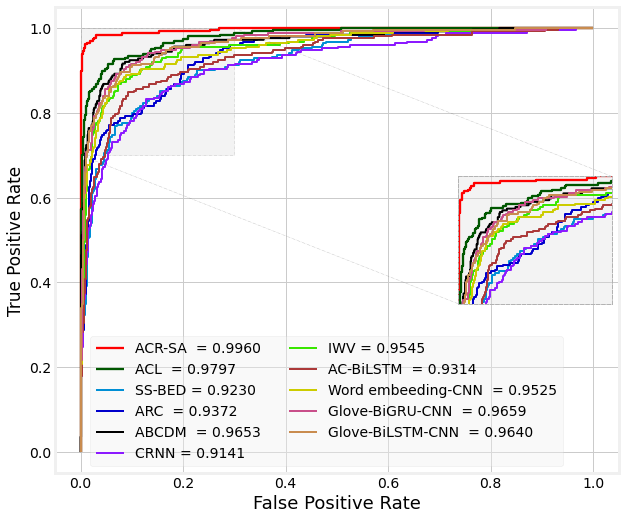

In [46]:
fpr_acl, tpr_acl, threshold2 = roc_curve(y_test_new, yhat_acl)
roc_auc_acl = auc(fpr_acl, tpr_acl)

fpr_our4, tpr_our4, threshold4 = roc_curve(y_test_new, yhat_our1)
roc_auc_our4 = auc(fpr_our4, tpr_our4)

fpr_our5, tpr_our5, threshold5 = roc_curve(y_test_new, yhat_our5)
roc_auc_our5 = auc(fpr_our5, tpr_our5)

fpr_ssbed, tpr_ssbed, threshold = roc_curve(y_test, yhat_ssbed)
roc_auc_ssbed = auc(fpr_ssbed, tpr_ssbed)

fpr_arc, tpr_arc, threshold = roc_curve(y_test, yhat_arc)
roc_auc_arc = auc(fpr_arc, tpr_arc)

fpr_abcdm, tpr_abcdm, threshold = roc_curve(y_test_exp, yhat_abcdm)
roc_auc_abcdm = auc(fpr_abcdm, tpr_abcdm)

fpr_crn, tpr_crn, threshold = roc_curve(y_test, yhat_crnn)
roc_auc_crn = auc(fpr_crn, tpr_crn)

fpr_iwv, tpr_iwv, threshold = roc_curve(y_test, yhat_iwv)
roc_auc_iwv = auc(fpr_iwv, tpr_iwv)

fpr_acbilstm, tpr_acbilstm, threshold = roc_curve(y_test, yhat_acbilstm)
roc_auc_acbilstm = auc(fpr_acbilstm, tpr_acbilstm)


fpr_cnn, tpr_cnn, threshold = roc_curve(y_test, yhat_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_gru, tpr_gru, threshold = roc_curve(y_test, yhat_gru)
roc_auc_gru = auc(fpr_gru, tpr_gru)

fpr_bilstm, tpr_bilstm, threshold = roc_curve(y_test, yhat_bilstm)
roc_auc_bilstm = auc(fpr_bilstm, tpr_bilstm)

#############################3333
fpr_stacked, tpr_stacked, threshold = roc_curve(y_test_new, yhat_our)
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
#################################3
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(111)
plt.gcf().set_facecolor('white')
ax.plot(fpr_our4, tpr_our4, label='ACR-SA  = %0.4f' % roc_auc_our4, linewidth=2.3, color = 'red')
ax.plot(fpr_acl, tpr_acl, label='ACL  = %0.4f' % roc_auc_acl, linewidth=2.3, color = '#005700')
ax.plot(fpr_ssbed, tpr_ssbed, label='SS-BED = %0.4f' % roc_auc_ssbed, linewidth=2)
ax.plot(fpr_arc, tpr_arc, label='ARC  = %0.4f' % roc_auc_arc, linewidth=2, color = '#0000cc')
ax.plot(fpr_abcdm, tpr_abcdm, label='ABCDM  = %0.4f' % roc_auc_abcdm, linewidth=2, color = 'black')
ax.plot(fpr_crn, tpr_crn, label='CRNN = %0.4f' % roc_auc_crn, linewidth=2, color = '#8c1aff')
ax.plot(fpr_iwv, tpr_iwv, label='IWV = %0.4f' % roc_auc_iwv, linewidth=2, color = '#39e600')
ax.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM  = %0.4f' % roc_auc_acbilstm, linewidth=2, color = '#ac3939')
ax.plot(fpr_cnn, tpr_cnn, label='Word embeeding-CNN  = %0.4f' % roc_auc_cnn, linewidth=2, color = '#cccc00')
ax.plot(fpr_gru, tpr_gru, label='Glove-BiGRU-CNN  = %0.4f' % roc_auc_gru, linewidth=2, color = '#c94f8a')
ax.plot(fpr_bilstm, tpr_bilstm, label='Glove-BiLSTM-CNN  = %0.4f' % roc_auc_bilstm, linewidth=2, color = '#c98c4f')

#ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
ax.set_facecolor('white')
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate')
ax.set_title('')
ax.legend(loc='lower left',  ncol = 2,bbox_to_anchor=(0.05, 0.0, 0.0, 0.0),framealpha= 0.4)


axins = zoomed_inset_axes(ax, 1, loc = 'center right')

axins.plot(fpr_our4, tpr_our4, label='ACR-SA  = %0.4f' % roc_auc_our4, linewidth=2.3, color = 'red')
axins.plot(fpr_acl, tpr_acl, label='ACL  = %0.4f' % roc_auc_acl, linewidth=2.3, color = '#005700')
axins.plot(fpr_ssbed, tpr_ssbed, label='SS-BED = %0.3f' % roc_auc_ssbed, linewidth=2)
axins.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f' % roc_auc_arc, linewidth=2, color = '#0000cc')
axins.plot(fpr_abcdm, tpr_abcdm, label='ABCDM = %0.3f' % roc_auc_abcdm, linewidth=2, color = 'black')
axins.plot(fpr_crn, tpr_crn, label='CRNN (area = %0.3f' % roc_auc_crn, linewidth=2, color = '#8c1aff')
axins.plot(fpr_iwv, tpr_iwv, label='IWV  = %0.3f' % roc_auc_iwv, linewidth=2, color = '#39e600')
axins.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM  = %0.3f' % roc_auc_acbilstm, linewidth=2, color = '#ac3939')
axins.plot(fpr_cnn, tpr_cnn, label='Word embeeding-CNN  = %0.3f' % roc_auc_cnn, linewidth=2, color = '#cccc00')
axins.plot(fpr_gru, tpr_gru, label='Glove-BiGRU-CNN  = %0.4f' % roc_auc_gru, linewidth=2, color = '#c94f8a')
axins.plot(fpr_bilstm, tpr_bilstm, label='Glove-BiLSTM-CNN  = %0.4f' % roc_auc_bilstm, linewidth=2, color = '#c98c4f')

axins.patch.set_facecolor('#d9d9d9')
axins.patch.set_alpha(0.3)

axins.spines['bottom'].set_color('0.7')
axins.spines['bottom'].set_linewidth('1')
axins.spines['bottom'].set_linestyle('--')
axins.spines['top'].set_color('0.7')
axins.spines['top'].set_linewidth('1')
axins.spines['top'].set_linestyle('--')
axins.spines['right'].set_color('0.7')
axins.spines['right'].set_linewidth('1')
axins.spines['right'].set_linestyle('--')
axins.spines['left'].set_color('0.7')
axins.spines['left'].set_linewidth('1') 
axins.spines['left'].set_linestyle('--')  

x1, x2, y1, y2 = 0, 0.3, 0.7, 1 # specify the limits

axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)
plt.grid(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=3, fc="#d9d9d9", ec="0.3", alpha = 0.3, ls = '-.')

plt.savefig(path+ dataset_name + '-AUC710_PJ.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.1)